Our objective was to analyze data from Baseball-reference.com and Boston weather data to answer the following questions:

1) Outside of the skill of the opposing team, what factors impact attendance at Red Sox home games from 2008-2017? 

2) Outside of the skill of the opposing team, what factors impact whether the Red Sox win home games from 2008-2017?

**TEAM 4 Team Assignment**

Lauren Evans, Patrick Pu, Cam Stewart, Janet Yeung, Jian Zhang

## 1. Clean and Prepare Dataset

The first step to this project is gathering the data and getting it into a usable form. We have manually scraped data from Baseball-reference.com into CSV files, but most of the columns are not ready to be used in analysis. First, though, let us just get the data into the notebook.

In [0]:
# import relevent packages

import pandas as pd
import numpy as np
import datetime as dt

# import csv files from GitHub

url = 'https://raw.githubusercontent.com/camstew1094/IS833-Team-Assignment/master/redsox'
redsox = pd.DataFrame()
years = range(2008,2019)

# loop through each year's csv and concatenate in one dataframe
# add in "Year" column
# reset "Gm#" to home game number, not season game number
# shift streak column by 1 game

for year in years:
  data = pd.read_csv(url + str(year) + ".csv", parse_dates=True)
  data["Year"] = year
  data["Gm#"] = range(1,len(data["Gm#"]) + 1)
  streak = ["0"]
  for i in data["Streak"]:
    streak = streak + [i]
  streak = streak[:-1]
  data["Streak"] = streak
  redsox = redsox.append(data)

Since we will only be using Boston weather data, we should remove games that are not played in Boston.

In [0]:
# remove road games

redsox = redsox[pd.isna(redsox["Unnamed: 4"])]

In [331]:
# reset index
# review data as it currently stands

redsox.index = range(891)
print(redsox.shape)
redsox.head()

(891, 22)


,Gm#,Date,Unnamed: 2,Tm,Unnamed: 4,Opp,W/L,R,RA,Inn,...,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled,Year
0,8,Tuesday Apr 8,boxscore,BOS,NaN,DET,W,5,0,NaN,...,2.5,Matsuzaka,Rogers,NaN,3:29,D,36567,---,NaN,2008
1,9,Wednesday Apr 9,boxscore,BOS,NaN,DET,L,2,7,NaN,...,3.0,Bonderman,Lester,NaN,3:45,N,37190,+,NaN,2008
2,10,Thursday Apr 10,boxscore,BOS,NaN,DET,W,12,6,NaN,...,1.5,Wakefield,Robertson,Papelbon,3:44,N,37612,-,NaN,2008
3,11,Friday Apr 11,boxscore,BOS,NaN,NYY,L,1,4,NaN,...,1.5,Wang,Timlin,NaN,2:59,N,37624,+,NaN,2008
4,12,Saturday Apr 12,boxscore,BOS,NaN,NYY,W,4,3,NaN,...,1.5,Beckett,Mussina,Papelbon,2:49,D,37461,-,NaN,2008


The names of a few column names didn't carry over from the original data source, so we need to manually add those column names.

In [332]:
# view the names of all columns

print(redsox.columns)

# rename the unnamed columns

redsox.columns = ['Gm#', 'Date', 'Boxscore Link', 'Tm', 'Home/Road', 'Opp', 'W/L', 'R',
       'RA', 'Inn', 'W-L', 'Rank', 'GB', 'Win', 'Loss', 'Save', 'Time', 'D/N',
       'Attendance', 'Streak', 'Orig. Scheduled', 'Year']

# view the new names of all columns

print(redsox.columns)

Index(['Gm#', 'Date', 'Unnamed: 2', 'Tm', 'Unnamed: 4', 'Opp', 'W/L', 'R',
       'RA', 'Inn', 'W-L', 'Rank', 'GB', 'Win', 'Loss', 'Save', 'Time', 'D/N',
       'Attendance', 'Streak', 'Orig. Scheduled', 'Year'],
      dtype='object')
Index(['Gm#', 'Date', 'Boxscore Link', 'Tm', 'Home/Road', 'Opp', 'W/L', 'R',
       'RA', 'Inn', 'W-L', 'Rank', 'GB', 'Win', 'Loss', 'Save', 'Time', 'D/N',
       'Attendance', 'Streak', 'Orig. Scheduled', 'Year'],
      dtype='object')


The current record of the team is stored as a string, with both Wins and Losses in the same string. These need to be separated out and turned into integers.

In [333]:
# extract the Wins and Losses from "W-L"
# isolate column to manipulate, create empty lists

record = redsox["W-L"]
wins_list = []
losses_list = []

# wins

for i, game in enumerate(record):
  wins_list = wins_list + [game.split("-")[0]]
  
# losses
  
for i, game in enumerate(record):
  losses_list = losses_list + [game.split("-")[1]]
  
# assign newly created lists to new columns
  
redsox["Wins"] = wins_list
redsox["Losses"] = losses_list
redsox.tail()

,Gm#,Date,Boxscore Link,Tm,Home/Road,Opp,W/L,R,RA,Inn,...,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled,Year,Wins,Losses
886,158,Wednesday Sep 26 (1),boxscore,BOS,NaN,BAL,W,19,3,NaN,...,Meisinger,NaN,3:10,D,33577,+,NaN,2018,107,51
887,159,Wednesday Sep 26 (2),boxscore,BOS,NaN,BAL,L,3,10,NaN,...,Barnes,Fry,3:45,N,34445,++,NaN,2018,107,52
888,160,Friday Sep 28,boxscore,BOS,NaN,NYY,L,6,11,NaN,...,Johnson,NaN,3:27,N,36779,-,NaN,2018,107,53
889,161,Saturday Sep 29,boxscore,BOS,NaN,NYY,L,5,8,NaN,...,Rodriguez,Chapman,3:40,D,36375,--,NaN,2018,107,54
890,162,Sunday Sep 30,boxscore,BOS,NaN,NYY,W,10,2,NaN,...,Cessa,NaN,3:20,D,36201,---,NaN,2018,108,54


The Date column has a few things wrong with it. First, it is stored as a string, not a datetime object. Second, if the game was part of a doubleheader, that information is stored in the Date column. We need to extract this information and put it in its own column.

In [334]:
# remove doubleheader indicators from "Dates"
# isolate column to manipulate, create empty lists

date_list = redsox["Date"]
new_date_list = []
doubleheader_list = []

# loop through the list

for i, date in enumerate(date_list):
  
  # if the string contains a (), remove it from the date, isolate the number, and assign date and doubleheader numbers to new lists
  
  if "(" in date:
    new_date = date.split(" (")[0]
    new_date_list = new_date_list + [new_date]
    doubleheader_list = doubleheader_list + [date.split(" (")[1][0]]
    
  # if the string does not contain a (), just assign the date as-is to the new list, assign a blank value to doubleheader list
    
  else:
    new_date_list = new_date_list + [date]
    doubleheader_list = doubleheader_list + [""]
    
# assign newly created lists to new columns
    
redsox["Date"] = new_date_list
redsox["Doubleheader"] = doubleheader_list
redsox.tail()

,Gm#,Date,Boxscore Link,Tm,Home/Road,Opp,W/L,R,RA,Inn,...,Save,Time,D/N,Attendance,Streak,Orig. Scheduled,Year,Wins,Losses,Doubleheader
886,158,Wednesday Sep 26,boxscore,BOS,NaN,BAL,W,19,3,NaN,...,NaN,3:10,D,33577,+,NaN,2018,107,51,1
887,159,Wednesday Sep 26,boxscore,BOS,NaN,BAL,L,3,10,NaN,...,Fry,3:45,N,34445,++,NaN,2018,107,52,2
888,160,Friday Sep 28,boxscore,BOS,NaN,NYY,L,6,11,NaN,...,NaN,3:27,N,36779,-,NaN,2018,107,53,
889,161,Saturday Sep 29,boxscore,BOS,NaN,NYY,L,5,8,NaN,...,Chapman,3:40,D,36375,--,NaN,2018,107,54,
890,162,Sunday Sep 30,boxscore,BOS,NaN,NYY,W,10,2,NaN,...,NaN,3:20,D,36201,---,NaN,2018,108,54,


There are a lot of columns that are either not relevent or are results of the game. We are only interested in the information that was publicly available before the game starts, because this is the only information that will affect attendance.

In [335]:
# drop unneeded columns

redsox.drop(["Boxscore Link", "R", "RA", "Inn", "W-L", "Win", "Loss", "Save", "Time", "Home/Road"], axis=1, inplace=True)
print(redsox.shape)
redsox.tail()

(891, 15)


,Gm#,Date,Tm,Opp,W/L,Rank,GB,D/N,Attendance,Streak,Orig. Scheduled,Year,Wins,Losses,Doubleheader
886,158,Wednesday Sep 26,BOS,BAL,W,1,up 9.5,D,33577,+,NaN,2018,107,51,1
887,159,Wednesday Sep 26,BOS,BAL,L,1,up 9.5,N,34445,++,NaN,2018,107,52,2
888,160,Friday Sep 28,BOS,NYY,L,1,up 8.0,N,36779,-,NaN,2018,107,53,
889,161,Saturday Sep 29,BOS,NYY,L,1,up 7.0,D,36375,--,NaN,2018,107,54,
890,162,Sunday Sep 30,BOS,NYY,W,1,up 8.0,D,36201,---,NaN,2018,108,54,


There are many more columns that are not in ideal form.


In [336]:
# convert "Streak" column to integer type
# isolate column to manipulate, create empty list

streak_list = redsox["Streak"]
new_streak_list = []

# loop through list

for i in streak_list:
  if i[0] == "+":
    new_streak_list = new_streak_list + [len(i)]
  elif i[0] == "-":
    new_streak_list = new_streak_list + [-len(i)]
  else:
    new_streak_list = new_streak_list + [0]
    
redsox["Streak"] = new_streak_list

# codify whether the game was rescheduled or not
# isolate column to manipulate, create empty list

rescheduled_list = redsox["Orig. Scheduled"]
new_rescheduled_list = []

# loop through list

for i in rescheduled_list:
  
  # if value is NaN, assign a 0 to new list
  
  if pd.isna(i):
    new_rescheduled_list = new_rescheduled_list + [0]
  
  # if value is anything except NaN, assign a 1 to new list
  
  else:
    new_rescheduled_list = new_rescheduled_list + [1]
    
# assign new list to new column, delete old column
    
redsox["Rescheduled"] = new_rescheduled_list
del redsox["Orig. Scheduled"]

# extract the weekday, month, and day number from "Date" string
# isolate column to manipulate, create empty lists

date_list = redsox["Date"]
weekday_list = []
month_list = []
day_list = []

# loop through list, split the string into 3 segments, assign those segments to the appropriate new lists

for i in date_list:
  weekday, month, day = i.split(" ")
  weekday_list = weekday_list + [weekday]
  month_list = month_list + [month]
  day_list = day_list + [day]
  
# assign new lists to new columns, delete old column
  
redsox["Weekday"] = weekday_list
redsox["Month"] = month_list
redsox["Day"] = day_list
del redsox["Date"]

# convert wins and losses to value BEFORE game (currently value after game ends)
# use wins and losses to calculate win percentage
# convert wins and losses to integers in new list, create empty lists


wins_list = pd.to_numeric(redsox["Wins"])
losses_list = pd.to_numeric(redsox["Losses"])
new_wins_list = []
new_losses_list = []

# loop through the wins_list

for i, j in enumerate(wins_list):
  
  # if they won the game, reduce win value by 1, assign value to new list
  
  if redsox["W/L"][i][0] == "W":
    new_wins_list = new_wins_list + [j-1]
    
  # if they did not win the game, just assign value to new list
    
  else:
    new_wins_list = new_wins_list + [j]
    
# loop through the losses_list
    
for i, j in enumerate(losses_list):
  
  # if they lost the game, reduce loss value by 1, assign value to new list
  
  if redsox["W/L"][i][0] == "L":
    new_losses_list = new_losses_list + [j-1]
    
  # if they did not lose the game, just assign value to new list
    
  else:
    new_losses_list = new_losses_list + [j]
    
# assign new lists to columns
# calculate win percentage column
# delete "W/L" column
    
redsox["Wins"] = new_wins_list
redsox["Losses"] = new_losses_list
redsox["Win Pct"] = redsox["Wins"] / (redsox["Wins"] + redsox["Losses"])

dummies = pd.get_dummies(redsox["W/L"])
redsox["W/L"] = dummies["W"]

# convert "GB" column to numeric
# isolate column to manipulate, create empty list

gb_list = redsox["GB"]
new_gb_list = []

# loop through list

for i in gb_list:
  
  # if they are in 1st place, GB will have "up" in it, remove it, assign new value to list
  
  if "up" in str(i):
    gb = pd.to_numeric(i[3:])
    new_gb_list = new_gb_list + [gb]
    
  # if they are tied for 1st place, assign 0 to new list
    
  elif str(i) == "Tied":
    gb = 0
    new_gb_list = new_gb_list + [gb]
    
  # if they are not in 1st place, change value to negative, assign new value to list
    
  else:
    gb = pd.to_numeric(i) * -1
    new_gb_list = new_gb_list + [gb]
    
# reassign values to column
    
redsox["GB"] = new_gb_list

# convert "D/N" to dummy variable

dummies = pd.get_dummies(redsox["D/N"])
dummies.columns = ["Day Game", "N"]

# join dummy columns to df

redsox = pd.concat([redsox, dummies], axis=1)

# delete unnecessary columns

del redsox["D/N"]
del redsox["N"]

# convert "Doubleheader" to dummy variables

dummies = pd.get_dummies(redsox["Doubleheader"])
dummies.columns = ["None", "Doubleheader GM1", "Doubleheader GM2"]

# join dummy columns to df

redsox = pd.concat([redsox, dummies], axis=1)

# delete unnecessary columns

del redsox["Doubleheader"]
del redsox["None"]

# convert "Weekday" to dummy variables

dummies = pd.get_dummies(redsox["Weekday"])

# join dummy columns to df

redsox = pd.concat([redsox, dummies], axis=1)

# delete unnecessary columns

# convert "Month" column to corresponding numerical values
# convert "Month" column to dummy variables

dummies = pd.get_dummies(redsox["Month"])

# calculate numerical month value based on dummy variables

dummies["Month"] = (4*dummies["Apr"])+(5*dummies["May"])+(6*dummies["Jun"])+(7*dummies["Jul"])+(8*dummies["Aug"])+(9*dummies["Sep"])+(10*dummies["Oct"])

# reassign "Month" column to calculated values

redsox["Month"] = dummies["Month"]

# convert individual year, month, and day columns into one "Date" column as datetime object

redsox["Date"] = pd.to_datetime(redsox[["Year", "Month", "Day"]])

# drop unnecessary columns

redsox.drop(["Year", "Month", "Day"], axis=1, inplace=True)

# create dummy variable for divisional opponents vs non-divisional opponents
# convert "Opp" to dummy variables

dummies = pd.get_dummies(redsox["Opp"])

# create "Division Opp" column by combining 4 relevant columns

dummies["Division Opp"] = dummies["NYY"] + dummies["TBR"] + dummies["BAL"] + dummies["TOR"]

# join dummy column to df

redsox = pd.concat([redsox, dummies["Division Opp"]], axis=1)

redsox.head()

,Gm#,Tm,Opp,W/L,Rank,GB,Attendance,Streak,Wins,Losses,...,Doubleheader GM2,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Date,Division Opp
0,8,BOS,DET,1,3,-2.5,36567,-3,3,4,...,0,0,0,0,0,0,1,0,2008-04-08,0
1,9,BOS,DET,0,3,-3.0,37190,1,4,4,...,0,0,0,0,0,0,0,1,2008-04-09,0
2,10,BOS,DET,1,2,-1.5,37612,-1,4,5,...,0,0,0,0,0,1,0,0,2008-04-10,0
3,11,BOS,NYY,0,5,-1.5,37624,1,5,5,...,0,1,0,0,0,0,0,0,2008-04-11,1
4,12,BOS,NYY,1,3,-1.5,37461,-1,5,6,...,0,0,0,1,0,0,0,0,2008-04-12,1


In [337]:
# import weather data

url = 'https://raw.githubusercontent.com/camstew1094/IS833-Team-Assignment/master/Boston_weather_clean.csv'
weather = pd.read_csv(url)

# convert year, month, and day columns to a "Date" column as datetime object

weather["Date"] = pd.to_datetime(weather[["Year", "Month", "Day"]])

# drop unnecessary columns

weather.drop(["Year", "Month", "Day"], axis=1, inplace=True)
print(weather.shape)
weather.head()

(3749, 22)


,High Temp (F),Avg Temp (F),Low Temp (F),High Dew Point (F),Avg Dew Point (F),Low Dew Point (F),High Humidity (%),Avg Humidity (%),Low Humidity (%),High Sea Level Press (in),...,High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events,Date
0,40,34,28,37,31,22,92,79,66,30.18,...,10,8,1,23,10,36,0.18,0.18,Both,2008-01-01
1,33,22,10,28,18,-3,82,66,49,30.20,...,10,10,9,28,15,38,0.00,0.00,Snow,2008-01-02
2,14,11,7,-3,-7,-9,60,50,40,30.62,...,10,10,10,25,17,32,0.00,0.00,None,2008-01-03
3,32,20,8,13,5,-8,63,50,36,30.60,...,10,10,10,23,12,28,0.00,0.00,None,2008-01-04
4,42,35,27,26,16,12,64,47,30,30.38,...,10,10,10,16,9,23,0.00,0.00,None,2008-01-05


In [338]:
# merge the two dataframes together

redsox_weather = redsox.merge(weather, on="Date", how="inner")
redsox_weather.tail()

,Gm#,Tm,Opp,W/L,Rank,GB,Attendance,Streak,Wins,Losses,...,Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
808,161,BOS,HOU,1,1,2.0,35722,-2,92,68,...,30.04,10,8,2,26,11,36,0.0,1.55,Rain
809,162,BOS,HOU,0,1,2.0,34517,1,93,68,...,30.23,10,10,10,13,8,17,0.0,0.00,None
810,7,BOS,TBR,0,1,2.0,36134,5,5,1,...,29.65,10,10,10,35,22,44,0.0,0.00,None
811,8,BOS,TBR,1,1,2.5,31821,6,6,1,...,29.69,10,10,10,20,12,27,0.0,0.01,Rain
812,9,BOS,TBR,1,1,2.5,31979,7,7,1,...,29.76,10,10,10,22,13,29,0.0,0.00,None


In [339]:
# drop rows where year is 2018

redsox_weather = redsox_weather[redsox_weather["Date"].dt.year != 2018]
redsox_weather.tail()

,Gm#,Tm,Opp,W/L,Rank,GB,Attendance,Streak,Wins,Losses,...,Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
805,158,BOS,TOR,1,1,3.0,34445,-2,91,66,...,29.76,10,10,10,16,9,21,0.0,0.00,None
806,159,BOS,HOU,0,1,3.0,34222,1,92,66,...,29.69,10,10,10,25,13,31,0.0,0.00,None
807,160,BOS,HOU,0,1,2.0,36623,-1,92,67,...,29.91,10,10,10,15,9,20,0.0,0.00,None
808,161,BOS,HOU,1,1,2.0,35722,-2,92,68,...,30.04,10,8,2,26,11,36,0.0,1.55,Rain
809,162,BOS,HOU,0,1,2.0,34517,1,93,68,...,30.23,10,10,10,13,8,17,0.0,0.00,None


In [340]:
# convert "Events" column to dummy variable

dummies = pd.get_dummies(redsox_weather["Events"])
redsox_weather["Rain"] = dummies["Rain"]

# delete unnecessary column

del redsox_weather["Events"]
redsox_weather.head()

,Gm#,Tm,Opp,W/L,Rank,GB,Attendance,Streak,Wins,Losses,...,Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Rain
0,8,BOS,DET,1,3,-2.5,36567,-3,3,4,...,30.38,10,10,10,17,9,21,0.0,0.00,0
1,9,BOS,DET,0,3,-3.0,37190,1,4,4,...,30.14,10,9,5,17,8,25,0.0,0.00,0
2,10,BOS,DET,1,2,-1.5,37612,-1,4,5,...,29.98,10,10,6,25,12,31,0.0,0.00,1
3,11,BOS,NYY,0,5,-1.5,37624,1,5,5,...,29.80,10,10,10,16,6,21,0.0,0.02,1
4,12,BOS,NYY,1,3,-1.5,37461,-1,5,6,...,29.40,10,4,0,15,9,25,0.0,0.45,1


## 2. Explore Variable Relationships -  factors that increase attendance



In [0]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

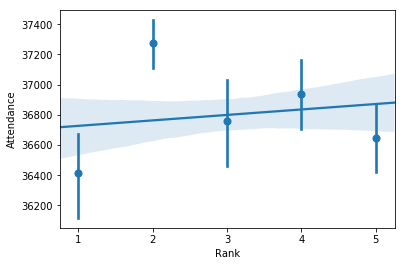

In [342]:
g = sns.regplot(x = 'Rank', y = 'Attendance', data = redsox_weather, x_estimator = np.mean)

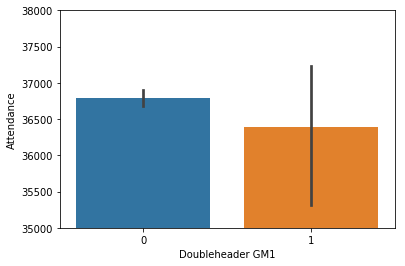

In [343]:
sns.barplot(x = 'Doubleheader GM1', y = 'Attendance', data = redsox_weather)
plt.ylim([35000, 38000]);

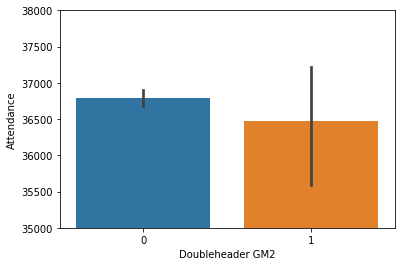

In [344]:
sns.barplot(x = 'Doubleheader GM2', y = 'Attendance', data = redsox_weather)
plt.ylim(35000, 38000);

In [345]:
redsox_weather["Attendance"].describe()

count      810.000000
mean     36787.192593
std       1633.468961
min      27704.000000
25%      36528.750000
50%      37359.500000
75%      37761.750000
max      38540.000000
Name: Attendance, dtype: float64

In [346]:
redsox_weather['Avg Temp (F)'].describe()

count    810.000000
mean      65.849383
std       10.453595
min       37.000000
25%       58.000000
50%       67.000000
75%       74.000000
max       92.000000
Name: Avg Temp (F), dtype: float64

First we looked at a scatterplot of average temperature and attendance of home games. We also looked at the descriptive statistics for Attendance and Average Temp (F) columns. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


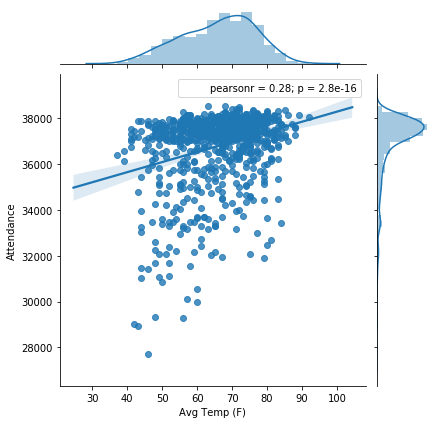

In [347]:

  
sns.jointplot(x="Avg Temp (F)", y="Attendance", data=redsox_weather, kind="reg", stat_func=stats.pearsonr)

Based on the calculation, the P value is smaller than 0.05, which means it is statistically related between the two variables, then we can find out that the Pearsonr's absolute value is smaller than 0.3, which means the correlation is relatively weak actually.

To examine the strength of the relationship, we created a residuals graph for temperature vs. attendance. If the relationship were linear, we would expect to see a random distribution of data points around 0. Looking at this graph, it appears that the distribution is not random. It seems to have a downward-sloping trend, indicating the relationship is not linear. 

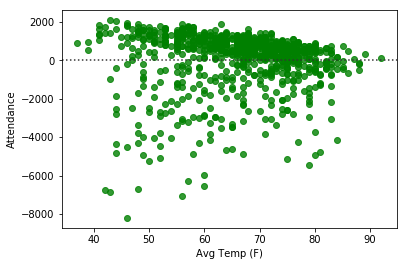

In [348]:
sns.residplot(x = 'Avg Temp (F)', y = 'Attendance', data = redsox_weather, color='green');

## average temperature has an effect on attendance

We wanted to explore whether playing on certain days of the week affected attendance. This is a bar graph that shows the number of attendees at Fenway by weekday. We can see that while attendance is fairly consistent, with a range between 36,000 and 37,500, the best attended games are on Fridays and Saturdays and the least attended games are on Tuesdays and Wednesdays. This makes sense, as more people have time to attend games on the weekends.

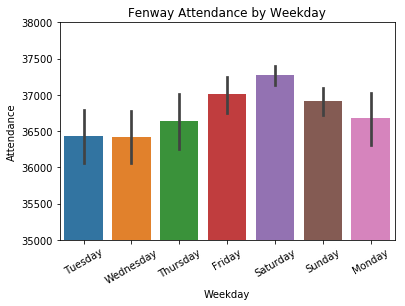

In [349]:
##explore day of week and attendance

import matplotlib.pyplot as plt

sns.barplot(x = 'Weekday', y = 'Attendance', data = redsox_weather, orient = 'v')
plt.title('Fenway Attendance by Weekday')
plt.ylim(35000, 38000)
plt.xticks(rotation=30);

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


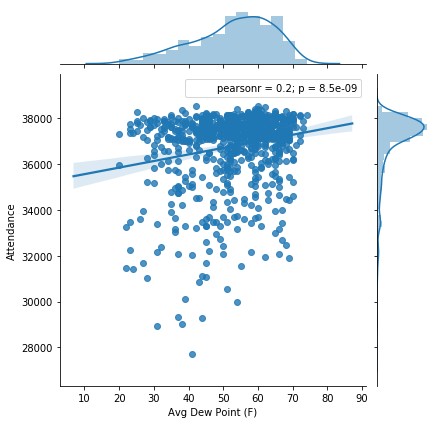

In [350]:
##average dew point and attendance

sns.jointplot(x="Avg Dew Point (F)", y="Attendance", data=redsox_weather, kind="reg", stat_func=stats.pearsonr)

Based on the calculation, the P value is smaller than 0.05, which means it is statistically related between the two variables, then we can find out that the Pearsonr's absolute value is smaller than 0.3, which means the correlation is relatively weak actually.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


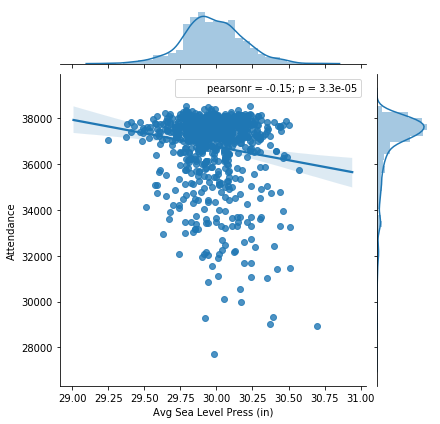

In [351]:
##sea level and attendance

sns.jointplot(x="Avg Sea Level Press (in)", y="Attendance", data=redsox_weather, kind="reg", stat_func=stats.pearsonr)

We also tested Humidity and Visibility, but these variables did not end up having a significant linear relationship with attendance.

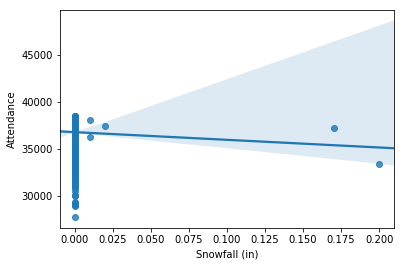

In [352]:
sns.regplot(x = 'Snowfall (in)', y = 'Attendance', data = redsox_weather);

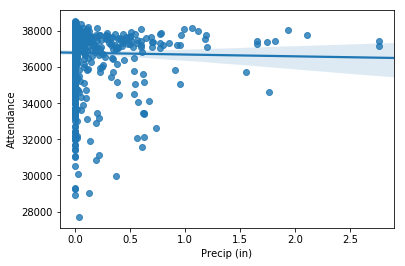

In [353]:
sns.regplot(x = 'Precip (in)', y = 'Attendance', data = redsox_weather);

## 3. Explore Variable Relationships - factors that affect W/L

We analyzed whether the average temperature (F), mean high temperature (F), and mean low temperature (F) for each weekday had any impact on whether the Red Sox won at Fenway. There are some noted differences but the margins of error make it difficult to draw any real conclusions. It seems that temperature seemed to have the greatest impact on Thursdays (higher temperature led to greater wins) and Mondays (higher temperature led to greater losses). Please note that in the following graphs W/L = 0 indicates a Red Sox loss, while W/L = 1 indicates a Red Sox win.

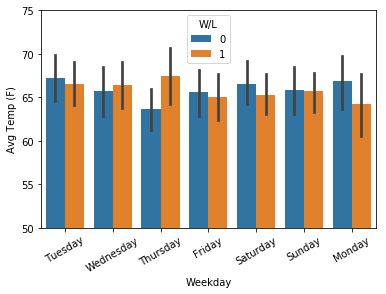

In [354]:
sns.barplot(x = 'Weekday', y = 'Avg Temp (F)', hue = 'W/L', data = redsox_weather, orient = 'v')
plt.ylim(50, 75)
plt.xticks(rotation=30);

The following is a graph that shows the winning percentage by weekday. Noting that there is a significant margin of area, we see that the Red Sox have the highest chance of winning on a Saturday (54.7%) and the lowest percent chance on a Thursday (39.0%).

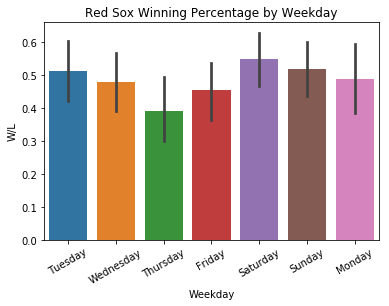

In [355]:
sns.barplot(x = 'Weekday', y = 'W/L', data = redsox_weather, orient = 'v')
plt.title('Red Sox Winning Percentage by Weekday')
plt.xticks(rotation=30);

A scatterplot of average temperature and accumulated wins does not tell us much. As you can tell, it is not a strictly linear relationship since the data points veer away from the regression line towards the top of the chart.

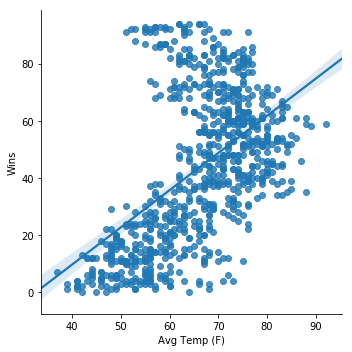

In [356]:
sns.lmplot(x = 'Avg Temp (F)', y = 'Wins', data = redsox_weather);

We created violin plots of the average temperature (F), mean high temperature (F), and mean low temperature (F). Looking at these graphs, we see that the mean average temperature was around 67 with a left skew, the mean high temperature was around 74 with a fairly normal distribution, and the mean low temperature was around 58 with a left skew. For the sake of this project we are only showing the average temperature.

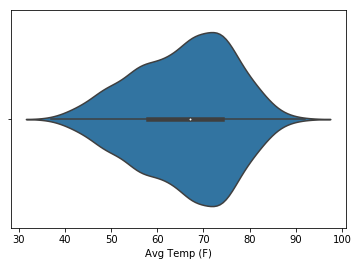

In [357]:
sns.violinplot(x='Avg Temp (F)', data=redsox_weather);

Through our EDA, we did not find many significant relationships between individual weather variables and Wins/Losses. We will explore the cumulative relationship between all of the weather data and Wins/Losses below with a logistic regression model.

# Build Logistic Regression to Predict W/L

##Preprocessing: Removing Variables w no Predictive Power

In [0]:
# remove spaces and standardize column names

redsox_weather.columns = redsox_weather.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [0]:
# Remove high/low weather info to keep only averages
# Sea level seems irrelevant this prediction, snowfall and precip are captured in the rain variable
# Weekday info is already captured in mon-sun variables
# For the purposes of this data set, we are going to remove information about the opponent and date

sox = redsox_weather.drop(columns = [
 'weekday',
 'tm',
 'opp',
 'date',
 'high_temp_f',
 'low_temp_f',
 'high_dew_point_f',
 'low_dew_point_f',
 'high_humidity_%',
 'low_humidity_%',
 'high_sea_level_press_in',
 'avg_sea_level_press_in',
 'low_sea_level_press_in',
 'high_visibility_mi',
 'avg_visibility_mi',
 'low_visibility_mi',
 'avg_wind_mph',
 'high_wind_mph',
 'high_wind_gust_mph',
 'snowfall_in',
 'rain'])

In [0]:
# change winning pct to full number

sox.win_pct = sox.win_pct * 100

In [0]:
# round win pct and replace null values with 0

sox['win_pct'] = sox['win_pct'].apply(lambda x: round(x, 3))
sox['win_pct'].fillna(0, inplace = True)

## Feature Matrix and Target Vector

In [0]:
# w/l is our target vector
# everything else is in our feature matrix

X = sox.drop(['w/l'], axis = 1)
y = sox['w/l']

## Split the data into train and test with a 70-30 split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state= 42)

## Instantiate and fit the model

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
# instantiate model

win_model = LogisticRegression(solver = 'liblinear') 

In [366]:
# fit model on training data

win_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Make predictions and find the overall accuracy on test set

In [0]:
# predict y values for test data set using model

y_model = win_model.predict(X_test)

In [368]:
# create test data set and join to our df

test = X_test.join(y_test).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

,index,gm#,rank,gb,attendance,streak,wins,losses,rescheduled,win_pct,...,thursday,tuesday,wednesday,division_opp,avg_temp_f,avg_dew_point_f,avg_humidity_%,precip_in,w/l,predicted
0,247,11,5,-5.0,37015,-1,2,8,0,20.000,...,0,1,0,1,57,40,58,0.08,0,1
1,670,42,2,-1.0,37354,1,25,16,0,60.976,...,0,0,0,0,61,46,60,0.00,0,0
2,227,128,3,-5.5,37451,4,73,54,1,57.480,...,0,0,1,0,63,62,94,2.76,0,1
3,290,99,1,3.0,37650,3,61,37,0,62.245,...,0,0,0,0,76,64,66,0.02,1,1
4,538,106,5,-11.0,37974,1,48,57,0,45.714,...,0,0,0,1,75,67,77,0.11,0,0


In [369]:
# print accuracy score

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.588477366255144

In [370]:
# print confusion matrix

print(confusion_matrix(y_test, y_model))

[[80 45]
 [55 63]]


In [371]:
# print classification report

print(classification_report(y_test, y_model))

              precision    recall  f1-score   support

           0       0.59      0.64      0.62       125
           1       0.58      0.53      0.56       118

   micro avg       0.59      0.59      0.59       243
   macro avg       0.59      0.59      0.59       243
weighted avg       0.59      0.59      0.59       243



## Our model and the ROC Curve

In [0]:
# Import necessary modules
from sklearn.metrics import roc_curve

In [0]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = win_model.predict_proba(X_test)[:,1]

In [0]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

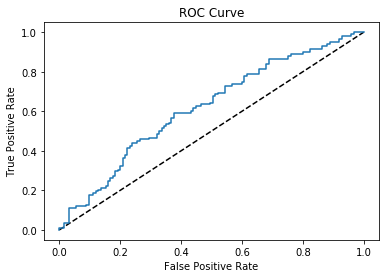

In [375]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Given the .59 accuracy rate, our logistic model is able outperform random chance to predict a red sox, home game w/l!

# Build Linear Regression to Predict Attendance

## Preprocessing

In [0]:
# this was completed with the logistic regression

## Feature Matrix and Target Vector

In [0]:
# attendance is our target vector
# everything else is in our feature matrix

A = sox.drop(['attendance'], axis = 1)
b = sox['attendance']

## Split the data into train and test with a 70-30 split

In [0]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = .3, random_state= 42)

## Using Lasso to Find Coefficients, Instantiate and Fit the Model

In [0]:
from sklearn.linear_model import Lasso

In [0]:
# instantiate model

attendance_model = Lasso(normalize=True)
attendance_model.fit(A, b)
lasso_coef = attendance_model.coef_

In [381]:
print(lasso_coef)
print(A.columns)

[ 0.00000000e+00  9.70256026e+00  1.51518415e+02 -1.25043794e+01
  2.09242005e+01  3.52593390e+01 -3.80233633e+01 -0.00000000e+00
 -1.32517942e+01  2.95583960e-01 -3.36367036e+02 -2.47172571e+02
  2.05984916e+02 -0.00000000e+00  4.97135038e+02  1.04239442e+02
 -0.00000000e+00 -2.74593933e+02 -2.52205726e+02  2.90674599e+01
  3.76863310e+01  0.00000000e+00 -5.66378274e+00 -0.00000000e+00]
Index(['gm#', 'w/l', 'rank', 'gb', 'streak', 'wins', 'losses', 'rescheduled',
       'win_pct', 'day_game', 'doubleheader_gm1', 'doubleheader_gm2', 'friday',
       'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday',
       'division_opp', 'avg_temp_f', 'avg_dew_point_f', 'avg_humidity_%',
       'precip_in'],
      dtype='object')


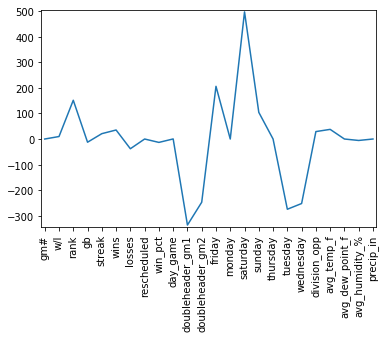

In [382]:
plt.plot(range(len(A.columns)), lasso_coef)
plt.xticks(range(len(A.columns)), A.columns.values, rotation=90)
plt.margins(0.01)
plt.show()

In [383]:
# fit model on training data

attendance_model.fit(A_train, b_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

## Make predictions and find the overall accuracy on test set

In [0]:
# predict y values for test data set using model

b_model = attendance_model.predict(A_test)

In [385]:
# create test data set and join to our df

test = A_test.join(b_test).reset_index()
test.join(pd.Series(b_model, name='predicted2')).head()

,index,gm#,w/l,rank,gb,streak,wins,losses,rescheduled,win_pct,...,thursday,tuesday,wednesday,division_opp,avg_temp_f,avg_dew_point_f,avg_humidity_%,precip_in,attendance,predicted2
0,247,11,0,5,-5.0,-1,2,8,0,20.000,...,0,1,0,1,57,40,58,0.08,37015,36643.021991
1,670,42,0,2,-1.0,1,25,16,0,60.976,...,0,0,0,0,61,46,60,0.00,37354,36836.589105
2,227,128,0,3,-5.5,4,73,54,1,57.480,...,0,0,1,0,63,62,94,2.76,37451,36588.568289
3,290,99,1,1,3.0,3,61,37,0,62.245,...,0,0,0,0,76,64,66,0.02,37650,37485.684385
4,538,106,0,5,-11.0,1,48,57,0,45.714,...,0,0,0,1,75,67,77,0.11,37974,36831.649588


In [386]:
from sklearn.metrics import mean_absolute_error

rmse = mean_absolute_error(b_test, b_model)
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 1035.0978701476652


In [387]:
print("R^2: {}".format(attendance_model.score(A_test, b_test)))

R^2: 0.1938027897401482


Given the very low r2, we would say that this model does not do a good job in explaining attendance at red sox games.

# THANK YOU!